<a href="https://colab.research.google.com/github/AmauriKudaka/Astro/blob/master/Amauri_Astroinform%C3%A1tica_II___Luciano_Aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo da Aula: continuar trabalhando com o modelo de trânsitos planetários e realizar ajustes com dados do simulador.

Instalação do módulo ktransit


In [1]:
!pip install ktransit

  Created wheel for ktransit: filename=ktransit-0.2.5-cp36-cp36m-linux_x86_64.whl size=125692 sha256=06220843afe1aa622cd89e3cc8f988b258168288e93ef0a5961c1ce9eb60de44
  Stored in directory: /root/.cache/pip/wheels/1f/07/3a/5ab602c06a4a0c4e9eec7addf2c88c9aca5c19694cfd8aec61
Successfully built ktransit


Modelo genérico de trânsito

Rodando o código abaixo cria um modelo de transito básico

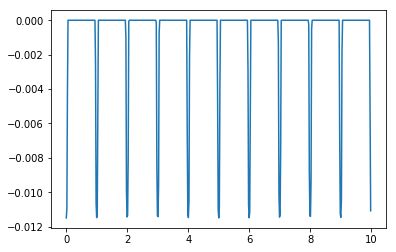

In [2]:
import ktransit
import matplotlib.pyplot as plt
%matplotlib inline

M = ktransit.LCModel()
M.add_star()
M.add_planet()
M.add_data()

tmod = M.transitmodel
plt.plot(M.time,tmod)

Modelo básico com dois planetas


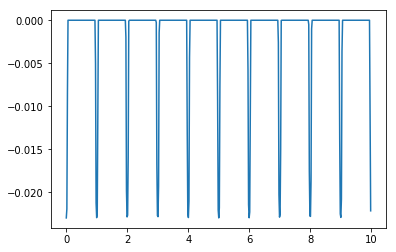

In [3]:
import ktransit
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib nbagg
M = ktransit.LCModel()
M.add_star()
M.add_planet()
M.add_planet()
M.add_data()
tmod = M.transitmodel
plt.plot(M.time,tmod)

Modelo com trânsito da Terra em torno do Sol

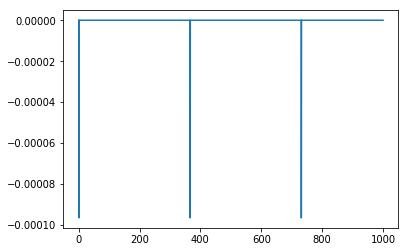

In [4]:
time,earthlc = ktransit.give_me_earth()
plt.plot(time,earthlc)

Notar dificuldade de detetar planeta como a terra pelo valor de decaimento do fluxo luminoso de 0.00010.
Jupiter tem um decaimento de 1 % - 

Esses modelos permitem simular, mesmo que não tenha medidas.

Este modelo permite inserir até 10 planetas

# Modelo com curvas e dados simulados

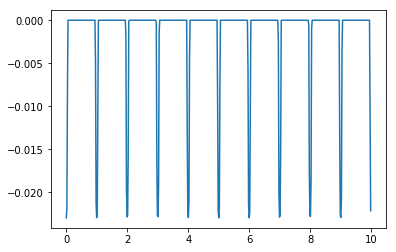

In [5]:
import ktransit
import matplotlib.pyplot as plt
import numpy

M = ktransit.LCModel()
M.add_star(
        rho=1.5, # mean stellar density in cgs units
        ld1=0.2, # ld1--4 are limb darkening coefficients 
        ld2=0.4, # if only ld1 and ld2 are non-zero then a quadratic limb darkening law is used
        ld3=0.0, # if all four parameters are non-zero we use non-linear flavour limb darkening
        ld4=0.0, 
        dil=0.0, # a dilution factor: 0.0 -> transit not diluted, 0.5 -> transit 50% diluted
        zpt=0.0  # a photometric zeropoint, incase the normalisation was wonky
        )
M.add_planet(
        T0=1.0,     # a transit mid-time  
        period=1.0, # an orbital period in days
        impact=0.1, # an impact parameter
        rprs=0.1,   # planet stellar radius ratio  
        ecosw=0.0,  # eccentricity vector
        esinw=0.0,
        occ=0.0)    # a secondary eclipse depth in ppm

M.add_planet() # you can add as many planets as you like (up to 10)

M.add_data(
        time=numpy.arange(0,10,0.0188),                                 # timestamps to evaluate the model on
        itime=numpy.zeros_like(numpy.arange(0,10,0.0188))+0.0188 )      # integration time of each timestamp

tmod = M.transitmodel # the out of transit data will be 0.0 unless you specify zpt
plt.plot(M.time,tmod)

## Modelo com dados reais

Ir até o site 'exoplanet.eu' 

selecionar sistema de detecção pelo método de transito primario -  planeta kepler 538 b estrela kepler 538

transportar valores para o modelo e gerar a curva de luz que seja proximo da curva de luz.

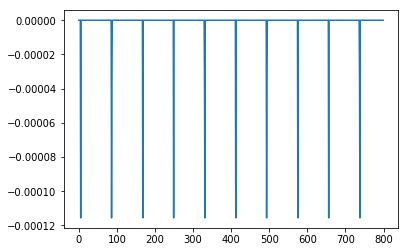

In [6]:
import ktransit
import matplotlib.pyplot as plt
import numpy

M = ktransit.LCModel()
M.add_star(
        rho=1.5, # mean stellar density in cgs units
        ld1=0.2, # ld1--4 are limb darkening coefficients 
        ld2=0.4, # if only ld1 and ld2 are non-zero then a quadratic limb darkening law is used
        ld3=0.0, # if all four parameters are non-zero we use non-linear flavour limb darkening
        ld4=0.0, 
        dil=0.0, # a dilution factor: 0.0 -> transit not diluted, 0.5 -> transit 50% diluted
        zpt=0.0  # a photometric zeropoint, incase the normalisation was wonky
        )
M.add_planet(
        T0=5,     # a transit mid-time  
        period=81.4, # an orbital period in days
        impact=0.41, # an impact parameter
        rprs=0.02,   # planet stellar radius ratio  
        ecosw=0.041,  # eccentricity vector
        esinw=0.0,
        occ=0.0)    # a secondary eclipse depth in ppm

# M.add_planet() # you can add as many planets as you like (up to 10)

M.add_data(
        time=numpy.arange(0,800,1),                                 # timestamps to evaluate the model on
        itime=numpy.zeros_like(numpy.arange(0,800,1))+1 )      # integration time of each timestamp

tmod = M.transitmodel # the out of transit data will be 0.0 unless you specify zpt
plt.plot(M.time,tmod)

## Lightkurve

É um pacote para análise de séries temporais em Python para o Kepler & TESS

usar informações do site: http://docs.lightkurve.org/


In [7]:
# instalar o lightkurve

!pip install lightkurve


     |████████████████████████████████| 481kB 2.7MB/s 
     |████████████████████████████████| 4.2MB 36.1MB/s 
     |████████████████████████████████| 235kB 41.2MB/s 
     |████████████████████████████████| 2.3MB 28.4MB/s 
     |████████████████████████████████| 61kB 19.8MB/s 
     |████████████████████████████████| 102kB 27.4MB/s 
  Created wheel for lightkurve: filename=lightkurve-1.1.1-cp36-none-any.whl size=495117 sha256=138bbc46cc0c9c7bfcb730fbec25862bb878c04e6c03e9a717a8bc59bccd22a0
  Stored in directory: /root/.cache/pip/wheels/85/da/fb/c1498ed5d32ab0adeb94e45e85d025845e5602f93ae5c8f627
  Created wheel for astroquery: filename=astroquery-0.3.9-cp36-none-any.whl size=3247933 sha256=9495116ad6253cfce99723ae0b6265f3872e63c621d99aa914ce6fb0e3565cdd
  Stored in directory: /root/.cache/pip/wheels/8a/d1/1e/4124d9ef35e2bbfbaa284c97dd49d9babbab42d966c4bea190
  Created wheel for oktopus: filename=oktopus-0.1.2-cp36-none-any.whl size=12781 sha256=51bd08b20746021773992865934423d2f241e19c9db

In [8]:
# Com o lightkurve é fácil extrair curvas de luz das imagens dos telescópios Keplee TESS. 
# Por exemplo, baixar e mostrar a estrela chamada de KIC 11554435.
# Primeiro, iniciamos o Python e usar a função 'search_targetpixelfile' para obter os dados de pixel do kepler do arquivo de dados.
# KIC 84662852 - procurar no google estrela de Tabby - Alien megastructure natural phenomenon.

from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile(11554435, quarter=16).download(quality_bitmask='hardest');

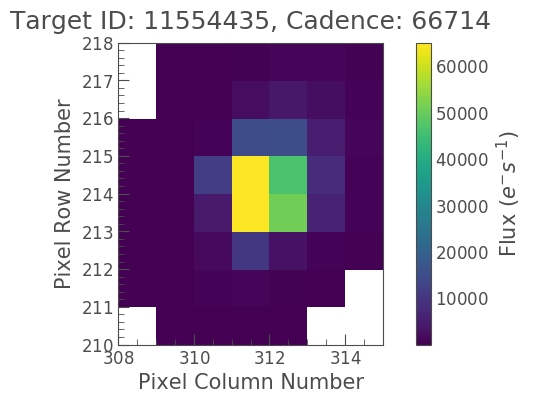

In [9]:
#Agora, mostrar a primeira imagem deste conjunto de dados.

pixelfile.plot(frame=1);

In [0]:
# Extrair a curva de luz somando todos os valores dos pixeis em cada imagem:
lc = pixelfile.to_lightcurve(aperture_mask='all')

In [11]:
# O método acima retorna o objeto 'KeplerLightCurve' que possibilita o acesso do fluxo no tempo.
# ambos como arrais em unidades de dias e eletrons/segundo.
# acrescentar 'lc.flux_err' 1:07:05

lc.time, lc.flux, lc.flux_err

(array([1472.11782489, 1472.13825811, 1472.15869114, ..., 1557.91855519,
        1557.93898936, 1557.95942343]),
 array([342254.47, 342299.56, 342363.84, ..., 339497.84, 339456.75,
        339294.1 ], dtype=float32),
 array([17.26458 , 17.265577, 17.265379, ..., 17.20628 , 17.205784,
        17.202576], dtype=float32))

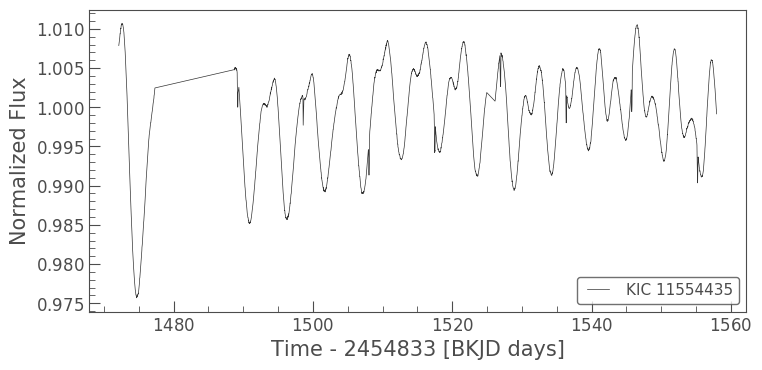

In [12]:
# Estes dados podem ser plotados usando o método 'plot()'
lc.plot()

#1:10:55



Ajuste de parâmetros de modelos
transportar os parametros de tempo fluxo e erro 
fitT.add_data(time=lc.time, flux=lc.flux, ferr=lc.flux_err

Os valores de periodo orbital 7, periodo 365 fator de impacto são chutados

vamos ter 

fazer ajustes para que de resultados 
fluxo tem que ser normalizado.

rodar do jeiro que está

não conseguiu mehorar os dados

são exatamente os mesmos valores de entrada

kepler 63 - (1:18)

periodo orbital 9.43 dias 

desafio: kepler 63 b

procurar valores adequados do valor real melhorar 




In [13]:
from ktransit import FitTransit
import numpy as np

#time = np.arange(0,10,0.0188)           # you need a time and a flux
#flux = np.zeros_like(time)              # there are no transits here :(
#ferr = np.ones_like(time) * 0.00001     # uncertainty on the data

fitT = FitTransit()
fitT.add_guess_star(rho=7)    
fitT.add_guess_planet(
        #period=365, impact=0.0, 
        period=9, impact=0.0,
        T0=0.0, rprs=0.009155)
#fitT.add_data(time=time, flux=flux, ferr=ferr)
fitT.add_data(time=lc.time, flux=(lc.flux/np.amax(lc.flux)), ferr=lc.flux_err)

vary_star = ['rho'       ]      # free stellar parameters
vary_planet = (['period',       # free planetary parameters
        'T0', 'impact', 
        'rprs'])                # free planet parameters are the same for every planet you model

fitT.free_parameters(vary_star, vary_planet)
fitT.do_fit()                   # run the fitting

fitT.print_results()            # print some results

Best-fitting stellar parameters
rho: 57218.86784275223

Best-fitting planet parameters for planet 0
period: 9.142340670103517
T0: -48.339293637685984
impact: 608404.2742794544
rprs: -47.02184149723946



Exibição dos resultados de simulação

In [0]:
#fig=ktransit.plot_results(time,flux,fitT.transitmodel)
#fig.savefig("transit.png")

In [15]:
maxFlux=np.amax(lc.flux)
print (maxFlux)

343217.7


## Encontrar o valor máximo de um array

Exemplo

In [16]:
#import numpy as np
import numpy as np
arr = np.array([11, 12, 13, 14, 15, 16, 17, 15, 11, 12, 14, 15, 16, 17])
maxElement = np.amax(arr)
print('Max element from Numpy Array : ', maxElement)


# para encontrar o maior valor de fluxo 

maxFlux=np.amax(lc.flux)
print (maxFlux)





Max element from Numpy Array :  17
343217.7


Ajustes de dados de alguns exoplantas.